In [1]:
import time

from face_extractor.face_extractor import FaceExtractor
from recognition.face_recog import FaceRecognizer

## Assign file path

In [17]:
VIDEO_PATH = '/opt/ml/project/input_dir/video/testvideo_3_0.mp4'
CLUSTER_IMG_SAVE_PATH = '/opt/ml/project/output_dir/cluster/testvideo_3_0_t1'

## Clustering

In [18]:
extractor = FaceExtractor(VIDEO_PATH,None,CLUSTER_IMG_SAVE_PATH,threshold=0.63,stop=1000,face_cnt=250)

--------------------------------------------------------------------------------
[Source Video File]: /opt/ml/project/input_dir/video/testvideo_3_0.mp4
[Frame resolution H x W]: (720.0 x 1280.0)
[FPS]: 29.97
[Total number of frames]: 31935
[Total number of seconds]: 1065
[Similiarty Threshold]: 0.63
[Number of target faces for clustering]: 250
--------------------------------------------------------------------------------


In [19]:
final_clusters = extractor.cluster_video()

>>> Extracting fingerprints...
>>> Clustering fingerprints...
>>> Merging clusters...
>>> Calculating average encoding and representative encoding...


In [20]:
extractor.summarize_results()

-------------------------------- Result Summary --------------------------------
[Face Extraction]: 20.813 seconds
[Clustering Fingerprints]: 0.013 seconds
[Merging Clusters]: 0.014 seconds
[Average Encoding & Pick Representative]: 6.188 seconds
[Total time]: 27.028 seconds
Total number of detected persons: 17
--------------------------------------------------------------------------------


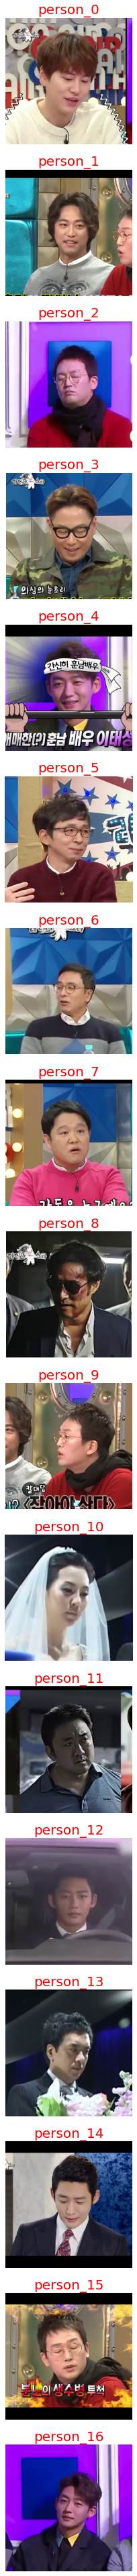

In [10]:
extractor.plot_clusters()

In [11]:
final_clusters.keys()

dict_keys(['person_0', 'person_1', 'person_2', 'person_3', 'person_4', 'person_5', 'person_6', 'person_7', 'person_8', 'person_9', 'person_10', 'person_11', 'person_12', 'person_13', 'person_14', 'person_15', 'person_16'])

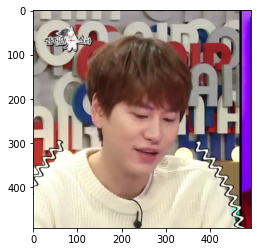

In [21]:
import matplotlib.pyplot as plt
plt.imshow(final_clusters['person_0']['repr_img_array'])

## Recognition

In [11]:
target_people = ['person_0', 'person_1','person_2','person_3','person_4','person_5','person_6','person_7','person_8']
target_repr_encoding = [final_cluster_results[person]['repr_encoding'] for person in target_people]
# target_avg_encoding = [final_cluster_results[person]['avg_encoding'] for person in target_people]

In [6]:
recognizer = FaceRecognizer(VIDEO_PATH, target_encoding=target_encoding)

In [7]:
start_time = time.time()

timelines, output_frames = recognizer.recognize_faces()
people_timeline = recognizer.make_people_timeline(timelines, output_frames)

end_time = time.time()
print('Recognition time: ',end_time-start_time,'seconds')

Recognition time:  164.66879725456238 seconds
